In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import math

<h2>Class Frequencies</h2>
<p> In this Dataset, we have 6750 Indian Actor (Male and Female) Images in 135 different categories or classes.</p>


In [2]:
classes = dict(Counter(os.listdir("Picked_data/")))
#print(classes)
for root, dirs, files in os.walk("Picked_data/"):
    total_count = len(os.listdir(root))
    actor_name = root.split("/")[1]
    if actor_name in classes:
        classes[actor_name]=total_count
for i,j in classes.items():
    if j==1:
        break
del classes[i]

    


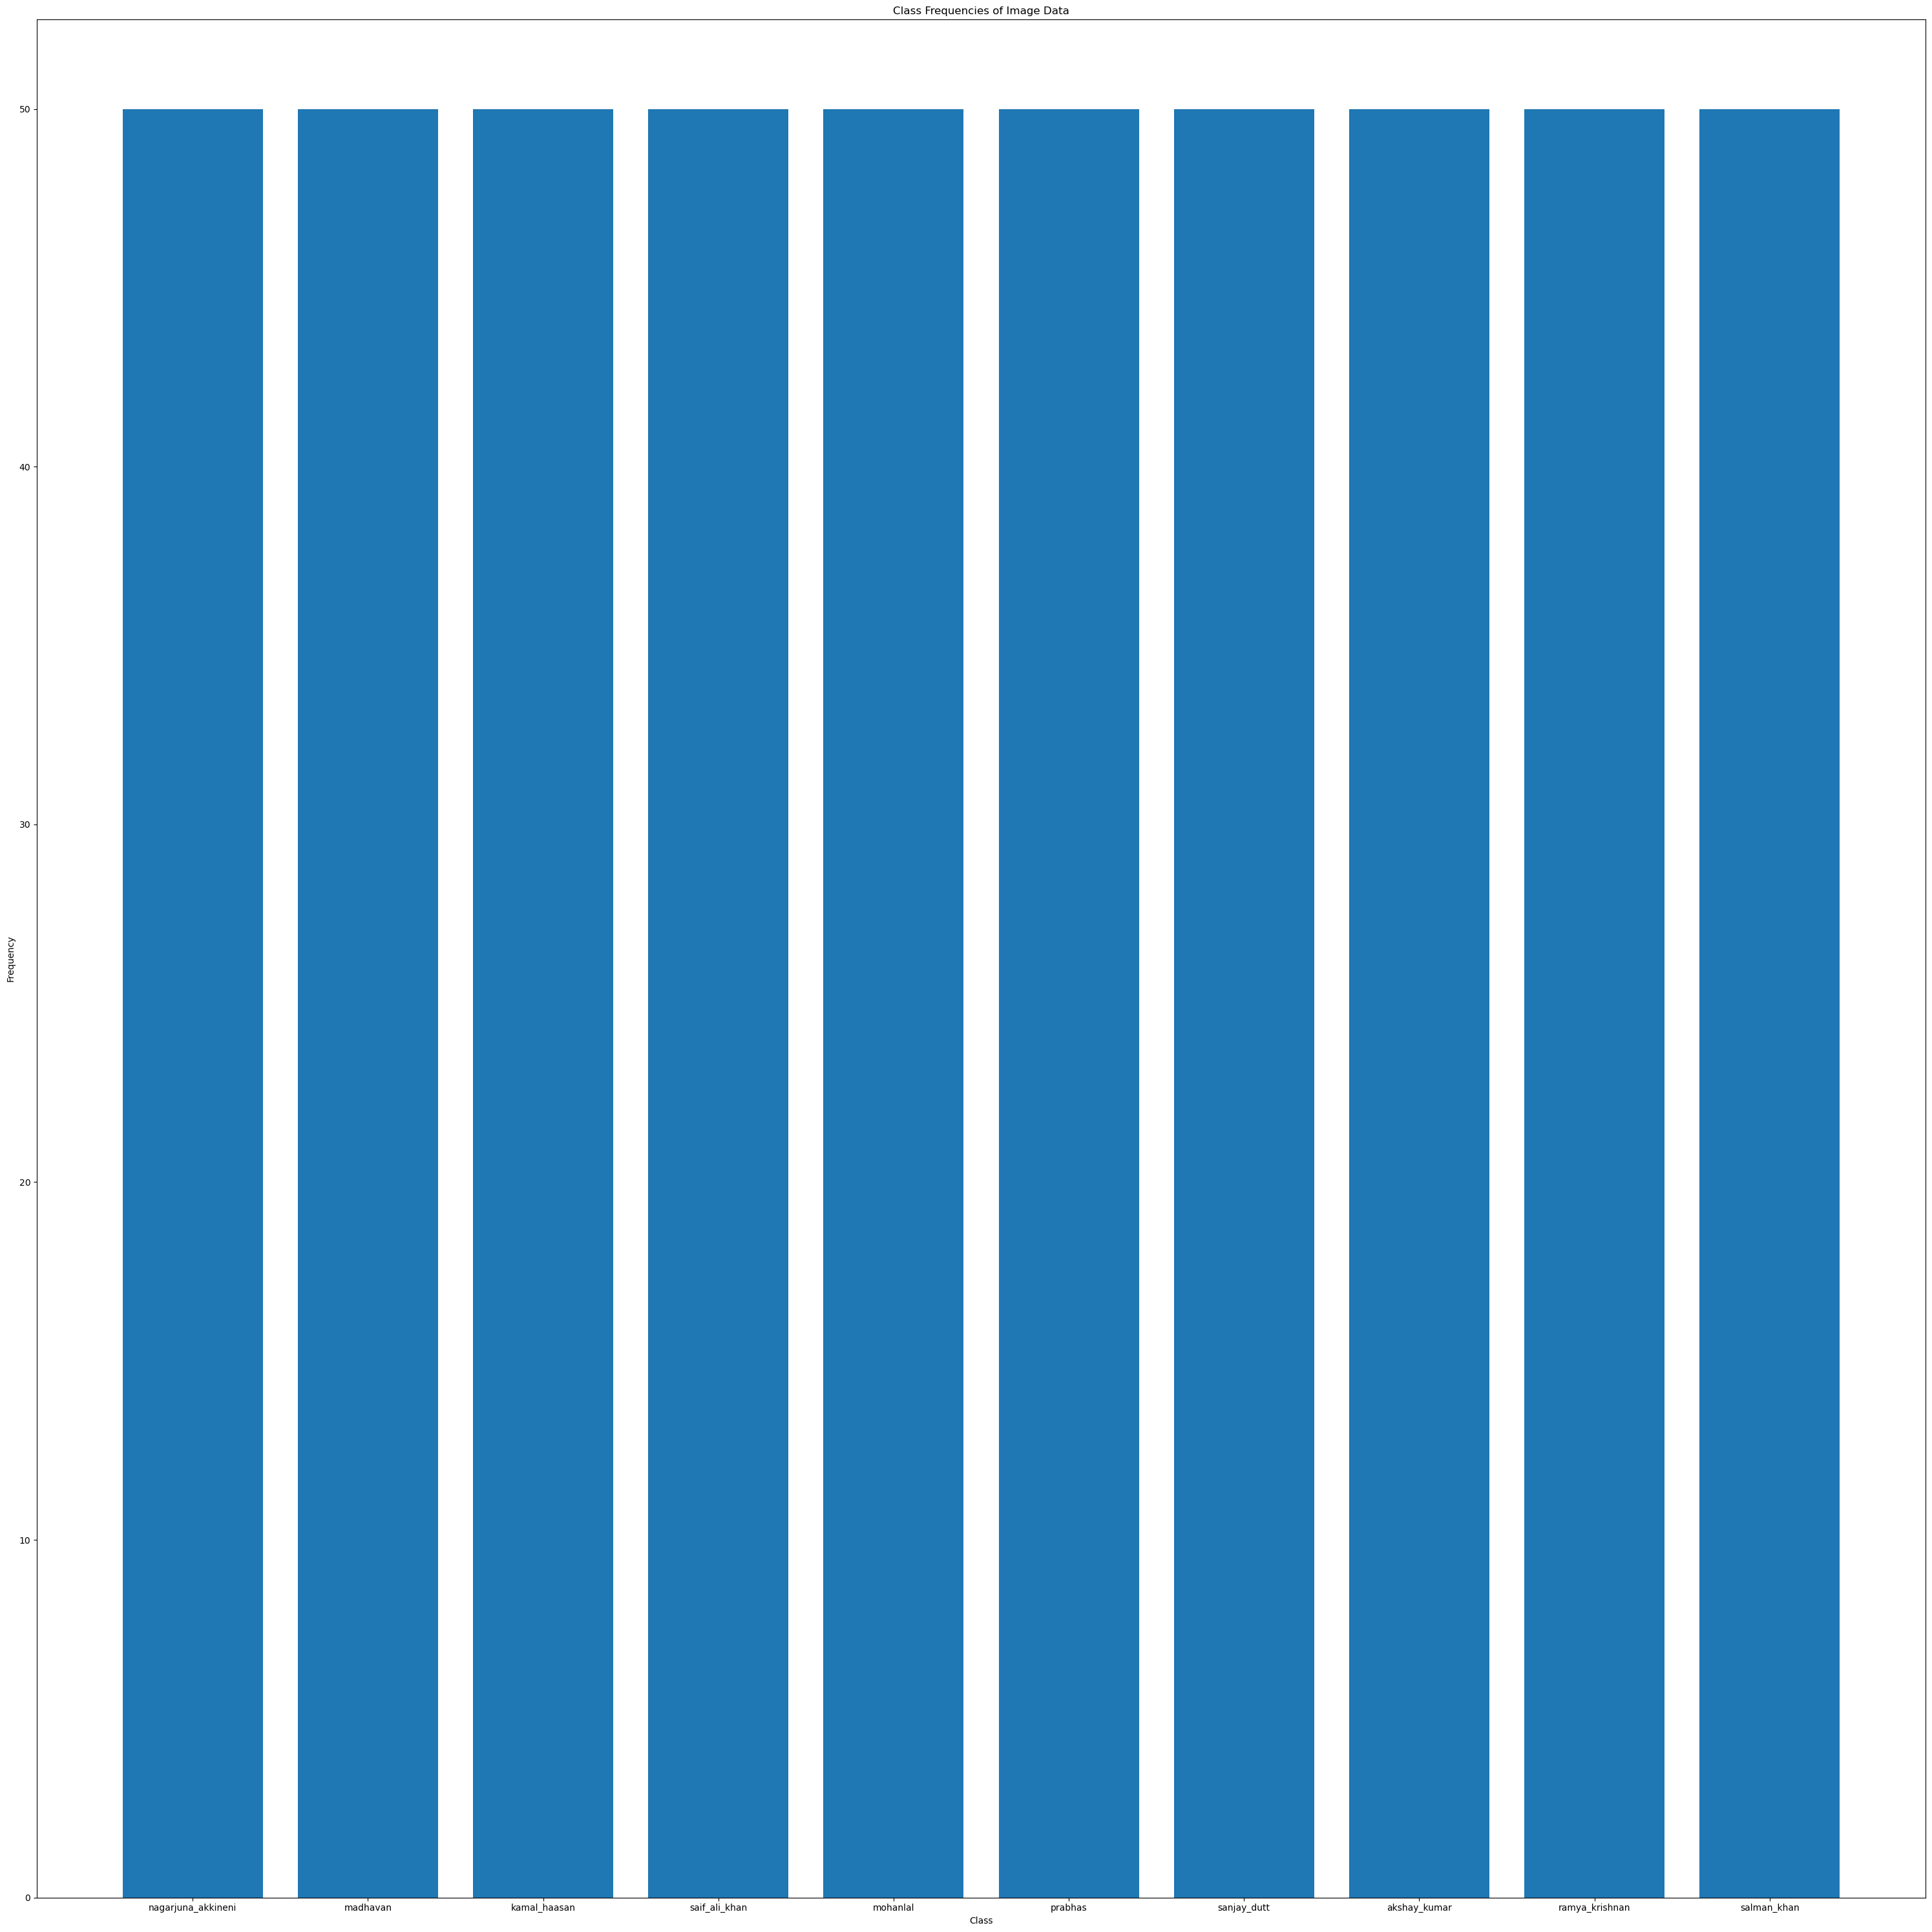

In [3]:
class_names = list(classes.keys())
frequencies = list(classes.values())

plt.figure(figsize=(30,30))
plt.bar(class_names, frequencies)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequencies of Image Data')
plt.tight_layout()
plt.show()



<p>From the plot it is cleary shows that all classes we are having balanced amount of data </p>

<h2>Distribution of image Size</h2>

In [4]:
def get_image_sizes(data_dir):
    class_sizes = {}

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file not in '.DS_Store':
                image_path = os.path.join(root, file)
                class_name = root.split("/")[1]
                image = cv2.imread(image_path)
                height, width, _ = image.shape
                if class_name not in class_sizes:
                    class_sizes[class_name] = []
                class_sizes[class_name].append((height, width))
        

    return class_sizes

In [5]:
data_dir = "Picked_data/"  
class_sizes = get_image_sizes(data_dir)

In [6]:
data = []
limit=0
max_size=0
limit1 = 0
min_size =math.inf
for class_name, sizes in class_sizes.items():
    sizes_combined = [size[0] * size[1] for size in sizes]
    limit=max(sizes_combined)
    if max_size < limit:
        max_size=limit
        ind = sizes_combined.index(max_size)
        size_max=sizes[ind]
        name = class_name
    limit1=min(sizes_combined)
    if min_size > limit1:
        min_size=limit1
        ind = sizes_combined.index(min_size)
        size_min=sizes[ind]
        name_min = class_name
    data.append(sizes_combined)
class_names = list(class_sizes.keys())


In [7]:


def get_image_size(image_path):
    """
    Returns the size (width, height) of an image.
    """
    with Image.open(image_path) as img:
        return img.size

def get_folder_image_sizes(folder_path):
    """
    Returns a dictionary containing the image sizes (width, height) for all images in a folder.
    The keys of the dictionary are the image filenames.
    """
    image_sizes = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
            image_path = os.path.join(folder_path, filename)
            size = get_image_size(image_path)
            image_sizes[image_path] = size
    return image_sizes

# Example usage
folder_path = "Data/akshay_kumar/"
image_sizes = get_folder_image_sizes(folder_path)
#print(image_sizes)


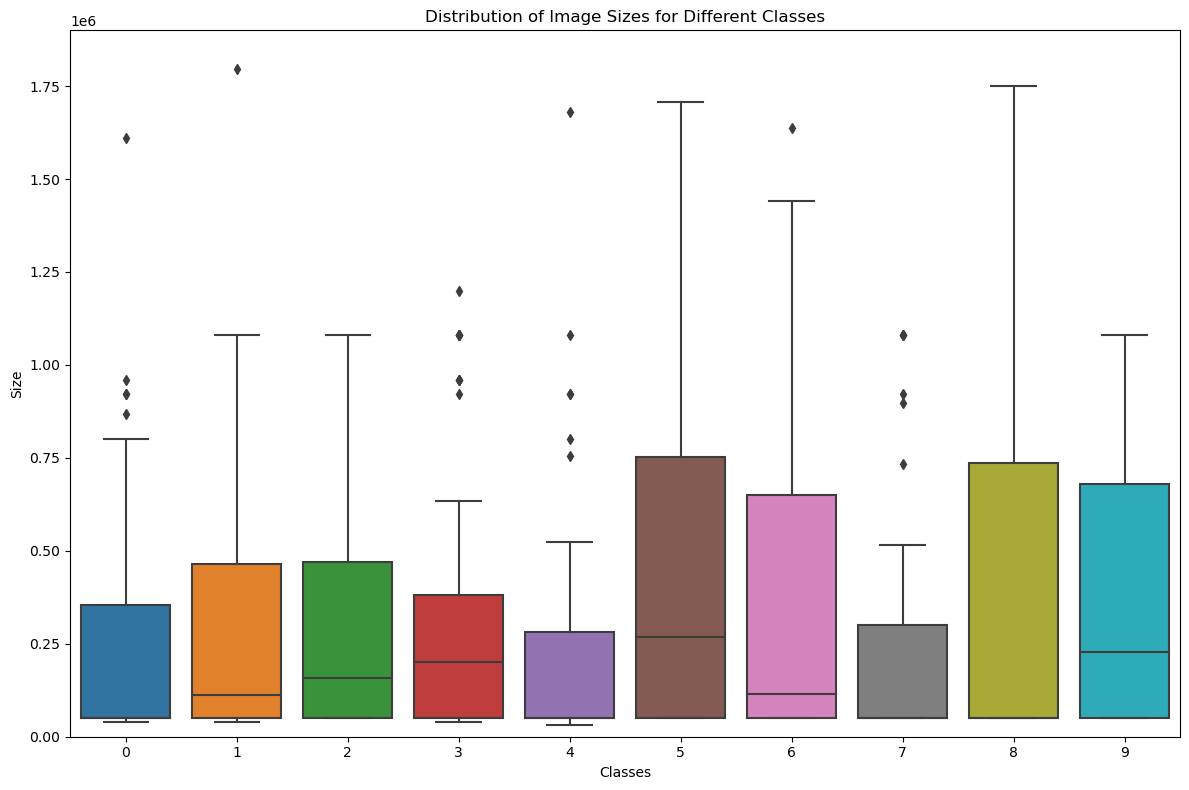

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xlabel('Classes')
plt.ylabel('Size')
plt.title('Distribution of Image Sizes for Different Classes')
plt.ylim(0, 1900000)
plt.tight_layout()
plt.show()


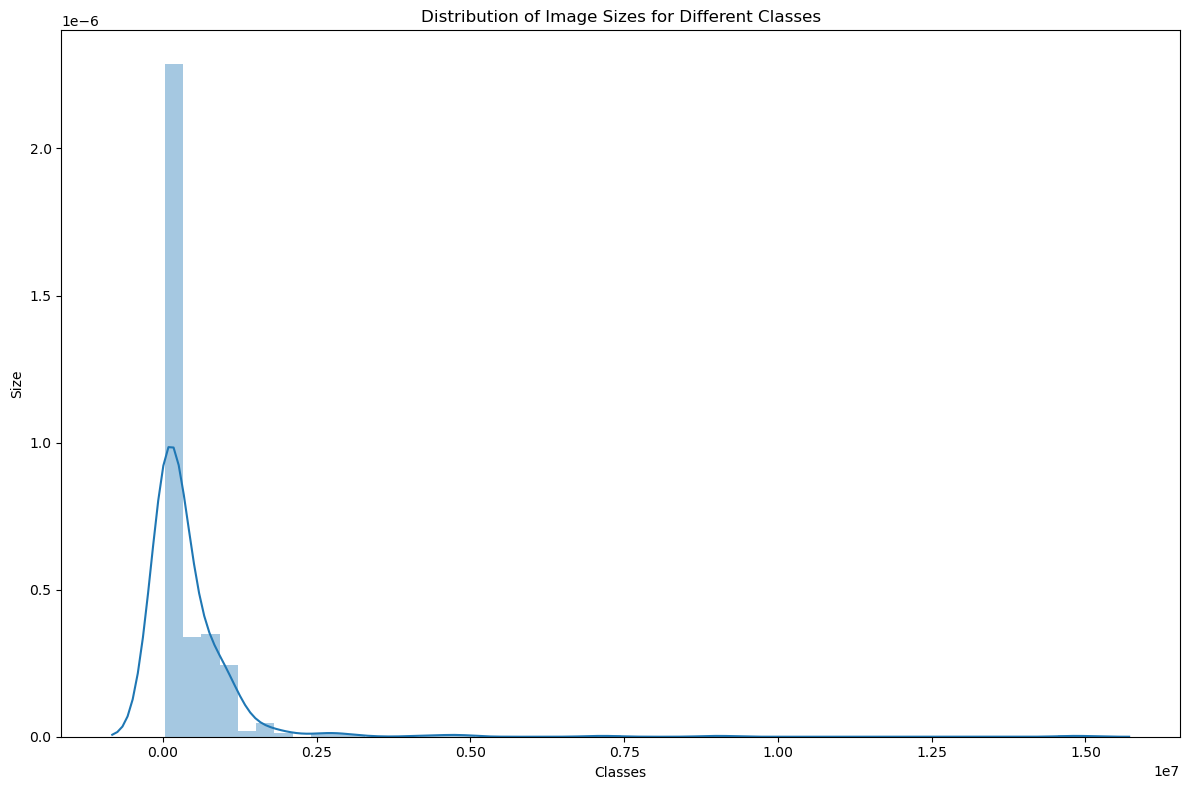

In [11]:

plt.figure(figsize=(12, 8))
sns.distplot(data)
plt.xlabel('Classes')
plt.ylabel('Size')
plt.title('Distribution of Image Sizes for Different Classes')
plt.tight_layout()
plt.show()


<p>From the Plot we can able to see that we have wide range of size of images and distribution follows right skewness so it can be beneficial to apply resizing or cropping techniques to bring the image sizes to a more balanced or desired range. </p>

In [12]:
directory = "Picked_data/"
path=[]
count=[]
for class_entry in os.scandir(directory):
    if class_entry.is_dir():
        class_path = class_entry.path
        #print(class_path)
        for image_entry in os.scandir(class_path):
            if image_entry.is_file():
                image_path = image_entry.path
                if len(image_path.split("/"))==3:
                    path.append(image_path)
        count.append(len(os.listdir(class_path)))

In [13]:



red_values = []
green_values = []
blue_values = []


red = []
green = []
blue = []
    
    

c=1
i=0
#print(len(count))
for image_path in path:
    if i < len(count) and c%count[i]==0:
        red.append(red_values)
        green.append(green_values)
        blue.append(blue_values)
        red_values = []
        green_values = []
        blue_values = []
        c=1
        i=i+1
        #print(i)
        
    # Load the image using PIL
    image = Image.open(image_path)

    # Convert the image to numpy array
    image_array = np.array(image)

    # Extract the RGB channels
    red_channel = image_array[:, :, 0].flatten()
    green_channel = image_array[:, :, 1].flatten()
    blue_channel = image_array[:, :, 2].flatten()

    # Append the mean channel values to the respective lists
    red_values.append(sum(red_channel)/len(red_channel))
    green_values.append(sum(green_channel)/len(green_channel))
    blue_values.append(sum(blue_channel)/len(blue_channel))
    c=c+1



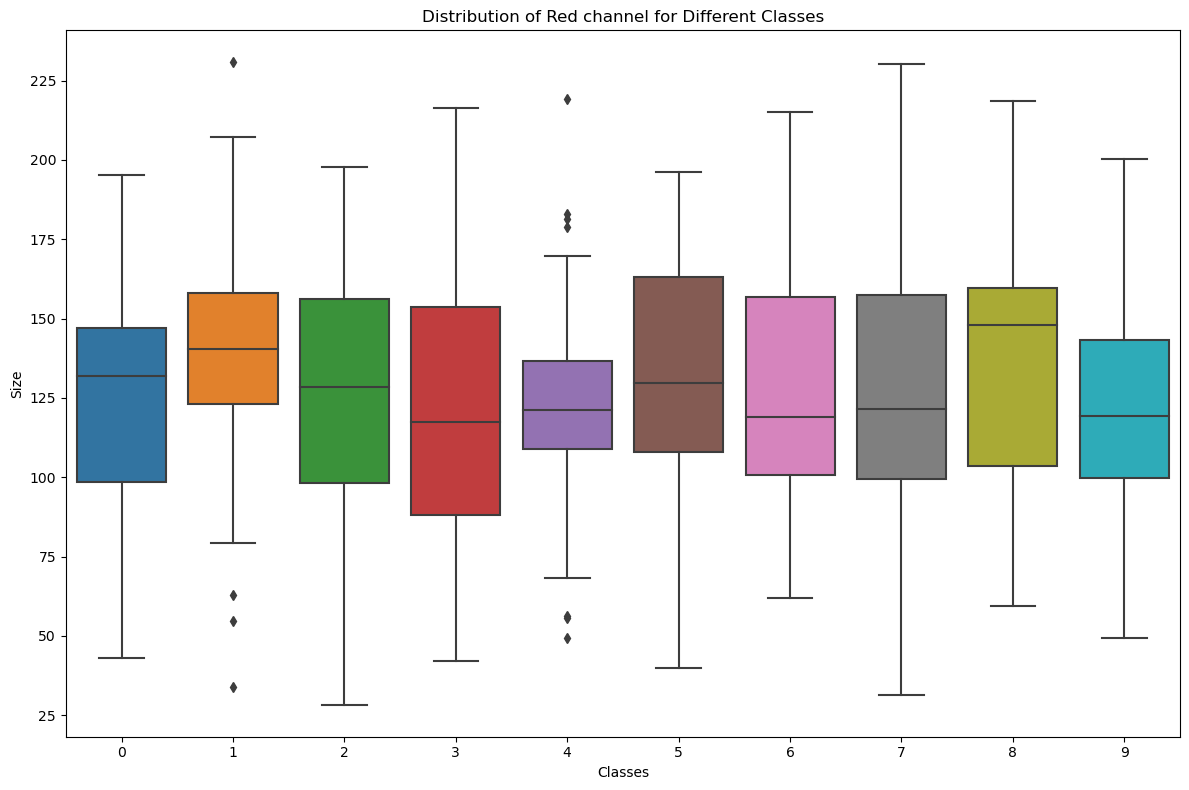

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=red)
plt.xlabel('Classes')
plt.ylabel('Size')
plt.title('Distribution of Red channel for Different Classes')
plt.tight_layout()
plt.show()

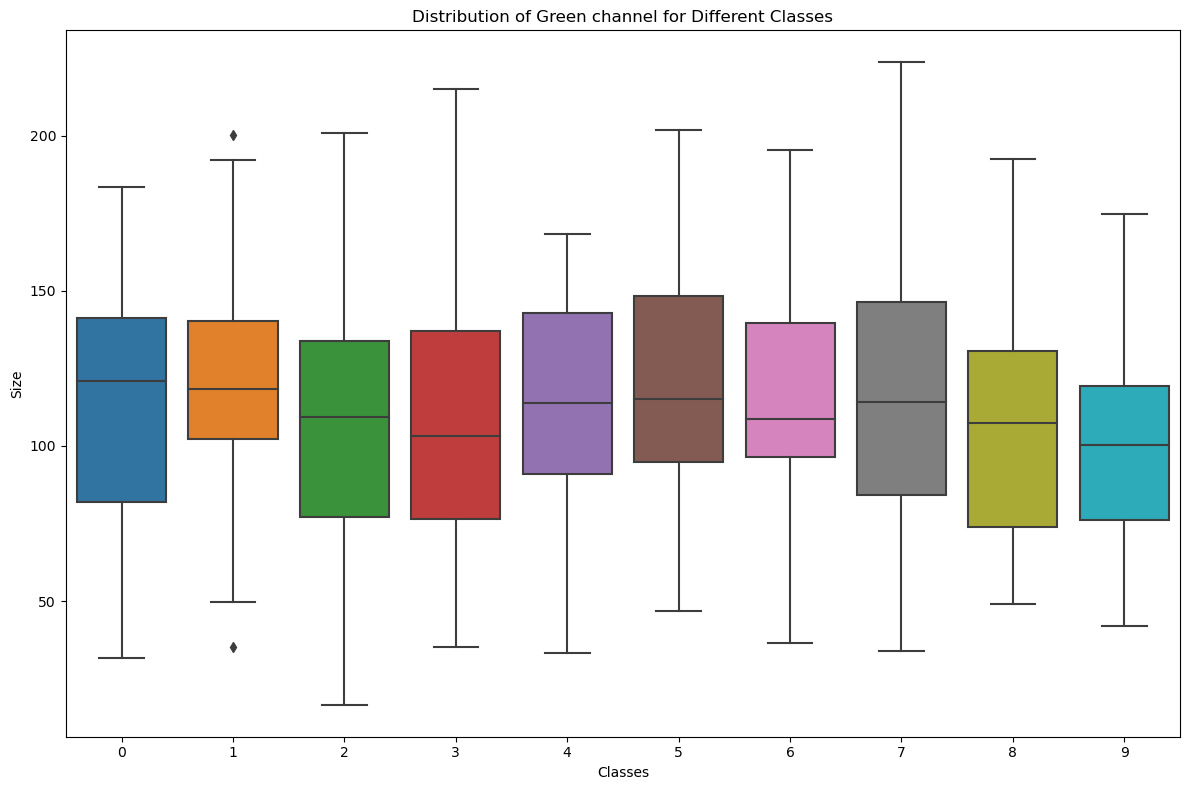

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=green)
plt.xlabel('Classes')
plt.ylabel('Size')
plt.title('Distribution of Green channel for Different Classes')
plt.tight_layout()
plt.show()

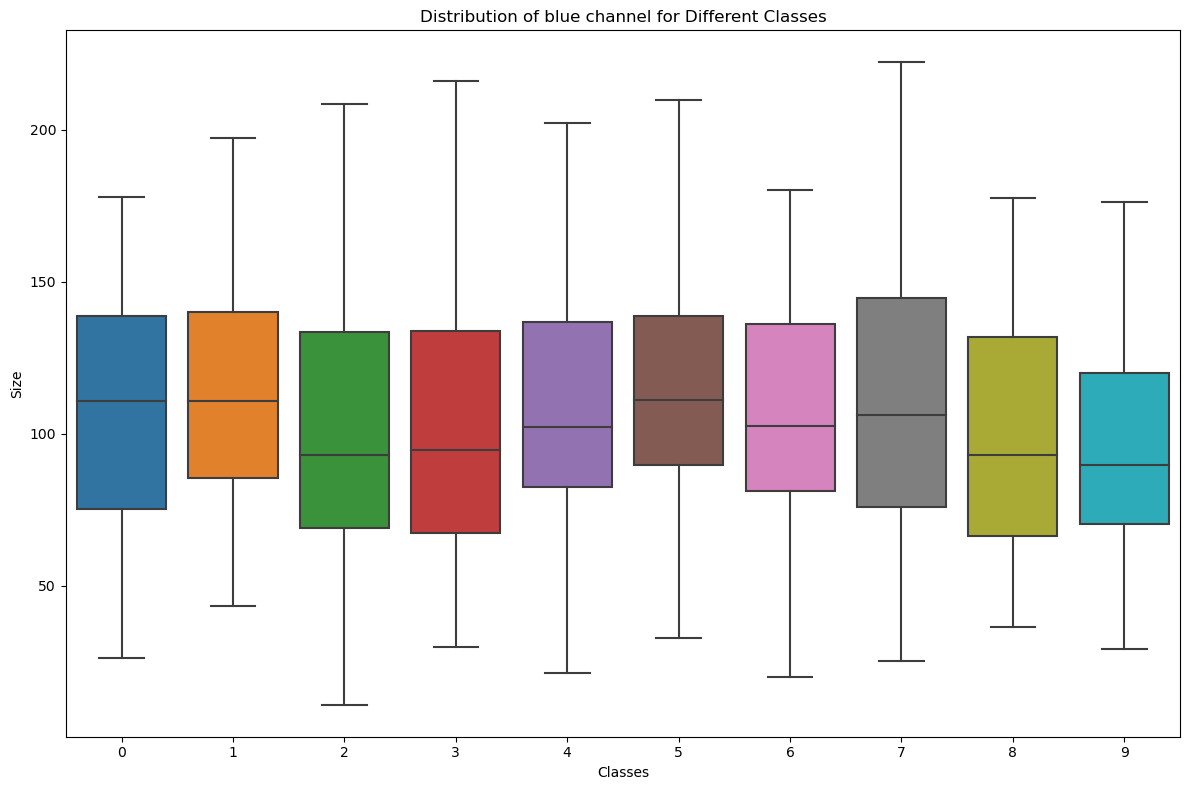

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=blue)
plt.xlabel('Classes')
plt.ylabel('Size')
plt.title('Distribution of blue channel for Different Classes')
plt.tight_layout()
plt.show()

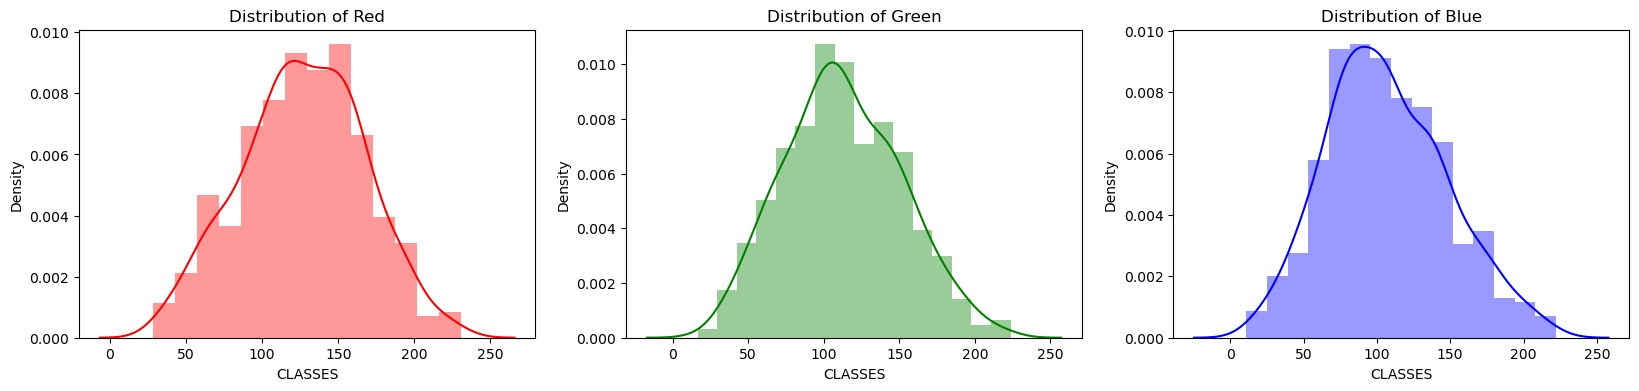

In [16]:
# Plotting distributions
f, axes = plt.subplots(figsize=(20,4), ncols=3, nrows=1)

sns.distplot(red, hist=True, ax=axes[0], color="red")
sns.distplot(green, hist=True, ax=axes[1], color="green")
sns.distplot(blue, hist=True, ax=axes[2], color="blue")


axes[0].set_xlabel("CLASSES")
axes[1].set_xlabel("CLASSES")
axes[2].set_xlabel("CLASSES")

axes[0].title.set_text('Distribution of Red')
axes[1].title.set_text('Distribution of Green')
axes[2].title.set_text('Distribution of Blue')




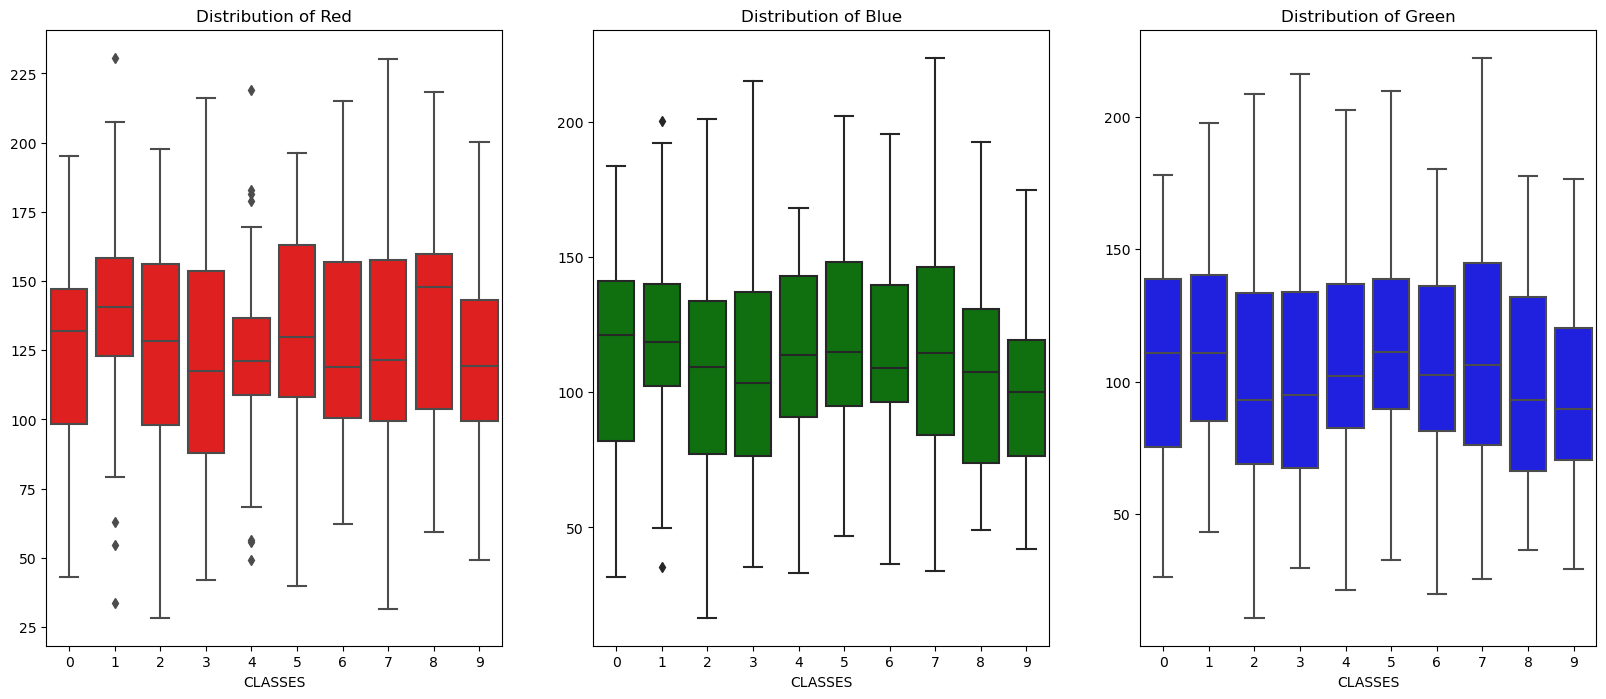

In [17]:
# Plotting distributions
f, axes = plt.subplots(figsize=(20,8), ncols=3, nrows=1)

sns.boxplot(red, ax=axes[0], color="red")
sns.boxplot(green, ax=axes[1], color="green")
sns.boxplot(blue, ax=axes[2], color="blue")


axes[0].set_xlabel("CLASSES")
axes[1].set_xlabel("CLASSES")
axes[2].set_xlabel("CLASSES")

axes[0].title.set_text('Distribution of Red')
axes[1].title.set_text('Distribution of Blue')
axes[2].title.set_text('Distribution of Green')



<p>The plots clearly demonstrate a Normal and Consistent distribution of RGB pixel values across all classes</p>